Another idea: motor vehicle collisions -- more likely on rainy, snowy, cold days?

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import pandas as pd

This blog post is dedicated to my mom, who insists that my dad's red Mazda 3s with Connecticut license plate attracts more tickets and police interest than the typical car. Let's see if the data support that...

I've started by downloading a JSON file containing all [NYC parking violations from FY2014](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2014-August-/jt7v-77mi) (safe to click -- won't trigger a download). I have to give a shout-out to the [NYC OpenData](https://data.cityofnewyork.us) initiative and website, because it is awesome! Unfortunately, this dataset has some bugs on the OpenData site...but [@tswanson](https://github.com/tswanson/) has provided a cleaned, geocoded version of the data linked [here](https://github.com/tswanson/NYCParkingGeocode). This contains a subset of the data (from July to October), but there are still >2 million rows, so there may be something interesting in there.

In [5]:
# parking = pd.read_csv("/Users/adrian/Downloads/parkinggeocoded.csv")
data = pd.read_csv("/Users/adrian/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2015.csv")

In [17]:
dt = pd.to_datetime(data['Issue Date'])

(array([ 2295.,  1080.,  1692.,  1918.,  2602.,  3291.,  1926.,  1379.,
         2380.,  2001.,  2939.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

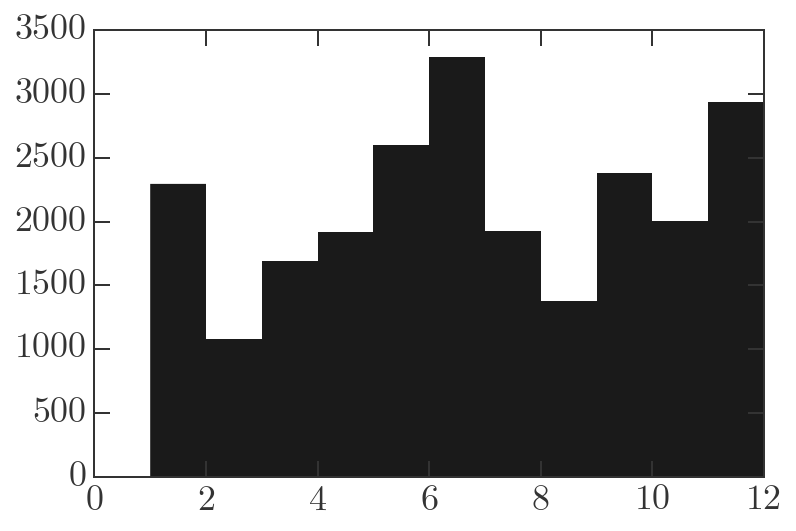

In [23]:
pl.hist(dt.dt.month,bins=np.arange(dt.dt.month.min(),dt.dt.month.max()+1,1))

In [3]:
parking.columns

Index(['SummonsNumber', 'PlateID', 'RegistrationState', 'PlateType',
       'IssueDate', 'ViolationCode', 'VehicleBodyType', 'VehicleMake',
       'IssuingAgency', 'StreetCode1', 'StreetCode2', 'StreetCode3',
       'VehicleExpirationDate', 'ViolationLocation', 'ViolationPrecinct',
       'IssuerPrecinct', 'IssuerCode', 'IssuerCommand', 'IssuerSquad',
       'ViolationTime', 'TimeFirstObserved', 'ViolationCounty',
       'ViolationInFrontOfOrOpposite', 'HouseNumber', 'StreetName',
       'IntersectingStreet', 'DateFirstObserved', 'LawSection', 'SubDivision',
       'ViolationLegalCode', 'DaysParkingInEffect', 'FromHoursInEffect',
       'ToHoursInEffect', 'VehicleColor', 'UnregisteredVehicle', 'VehicleYear',
       'MeterNumber', 'FeetFromCurb', 'ViolationPostCode',
       'ViolationDescription', 'NoStandingorStoppingViolation',
       'HydrantViolation', 'DoubleParkingViolation', 'precinct', 'gsRetCode',
       'latitude', 'longitude', 'message', 'onstreet', 'fromstreet',
       'tost

In [18]:
vehicle_colors = parking.VehicleColor.unique()
vehicle_colors = vehicle_colors.astype(str).tolist()

In [22]:
red_colors = [col.lower() for col in vehicle_colors if 'red' in col.lower() or 'rd' in col.lower()]

['red',
 'rd',
 'rdw',
 'rd/',
 'rdg',
 'rdb',
 'wh/rd',
 'red/w',
 'ford',
 'red &',
 'dkrd',
 'rdt',
 'rdyl',
 'rd/yl',
 'or/rd',
 'brd',
 'rd/bk',
 'w/red',
 'tn/rd',
 'bk/rd',
 'rdy',
 'rd/wh',
 'rdwhi',
 'redc',
 'rd wt',
 'rd wh',
 'whtrd',
 'grd',
 'redye',
 'burd',
 'rd ye',
 'redbl',
 'redwh',
 'redd',
 'red/b',
 'rdm',
 'dk rd',
 'brdg',
 'rdo',
 'rede',
 'wt/rd',
 'gr/rd',
 'red/s',
 'yl rd']